# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  

1.   Elemento de la lista
2.   Elemento de la lista


---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [ ]:
# COMPLETAR: importa las librerias necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUI

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos

*   Elemento de la lista
*   Elemento de la lista


Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

In [ ]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones)["Close"]
datos.head()

/tmp/ipython-input-254752425.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones)["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2025-08-18,231.490005,204.107559,516.251282
2025-08-19,228.009995,202.309189,508.933350
2025-08-20,223.809998,200.011230,504.890015
2025-08-21,221.949997,200.440842,504.239990
2025-08-22,228.839996,206.535400,507.230011


In [ ]:
datos.tail() # Veo los ultimos 5 datos

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009
2025-09-17,231.619995,249.850006,510.019989
2025-09-18,232.229996,250.669998,508.739990


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

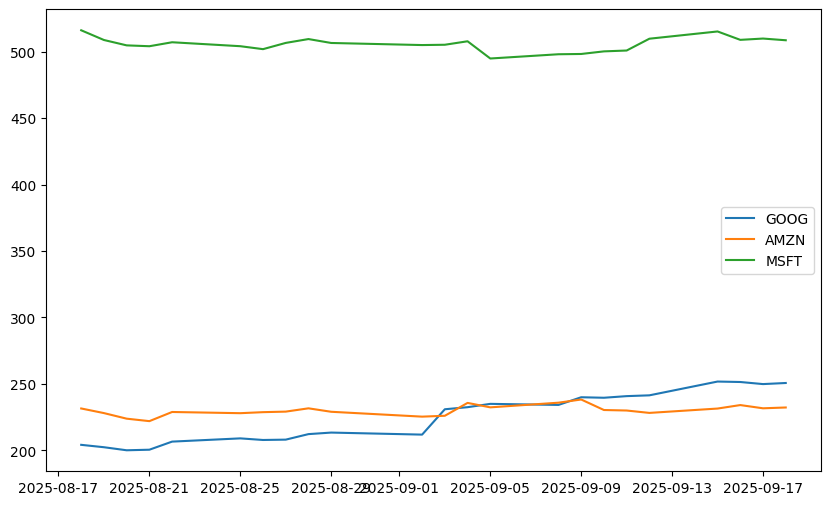

In [ ]:
# COMPLETAR: grafica de las tres series de precios en una sola gráfica

plt.figure(figsize=(10, 6))
plt.plot(datos["GOOG"], label="GOOG")
plt.plot(datos["AMZN"], label="AMZN")
plt.plot(datos["MSFT"], label="MSFT")
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

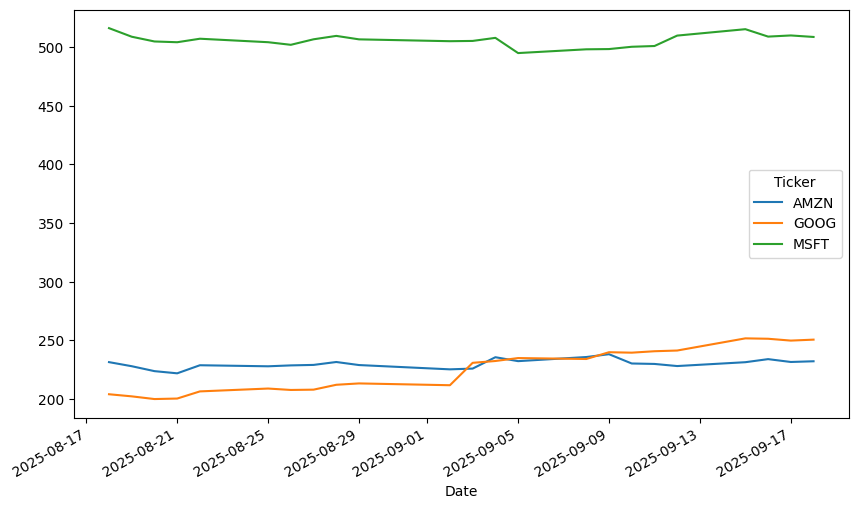

In [ ]:
datos.px
plt.show()

## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.



In [ ]:
# COMPLETAR: calcula los rendimientos logarítmicos

rendimientos = np.log(datos / datos.shift(1))
rendimientos = rendimientos.dropna()
(rendimientos.head())

# Graficar
# COMPLETAR AQUÍ

Ticker,AMZN,GOOG,MSFT
Date,,,
2025-08-19,-0.015147,-0.008850,-0.014277
2025-08-20,-0.018592,-0.011424,-0.007976
2025-08-21,-0.008345,0.002146,-0.001288
2025-08-22,0.030571,0.029953,0.005912
2025-08-25,-0.003941,0.011734,-0.005873


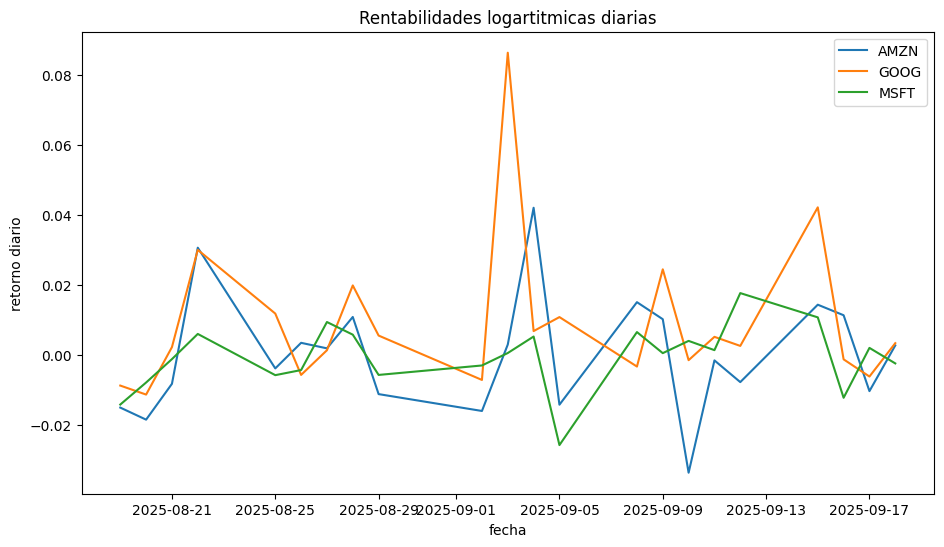

In [ ]:
# COMPLETAR: graficar los rendimientos logaritmicos diarios

plt.figure(figsize=(11, 6))

for c in rendimientos.columns:
    plt.plot(rendimientos.index, rendimientos[c], label=c)

plt.title("Rentabilidades logartitmicas diarias")
plt.xlabel("fecha")
plt.ylabel("retorno diario")
plt.legend()
plt.show()

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?


- Cuando observamos **precios**, vemos una tendencia general, es decir, crecen o decrecen en el tiempo.
- En cambio, al observar **rentabilidades**, vemos la variacion diaria (subidas y bajadas alrededor de 0).

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.



In [ ]:
# COMPLETAR: calcula media y desviación estándar

media = rendimientos.mean()
volatilidad = volatilidad = rendimientos.std()

print("Rentabilidad promedio diaria:")
print(media)
print("\nVolatilidad diaria:")
print(volatilidad)

Rentabilidad promedio diaria:
Ticker
AMZN    0.000145
GOOG    0.009340
MSFT   -0.000666
dtype: float64

Volatilidad diaria:
Ticker
AMZN    0.016996
GOOG    0.021727
MSFT    0.009388
dtype: float64


🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

- La acción con mayor **rentabilidad promedio** es la más rentable.  
- La acción con mayor **volatilidad** es la más riesgosa.  
- Generalmente, a mayor rentabilidad esperada también se asume un mayor riesgo.

## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.



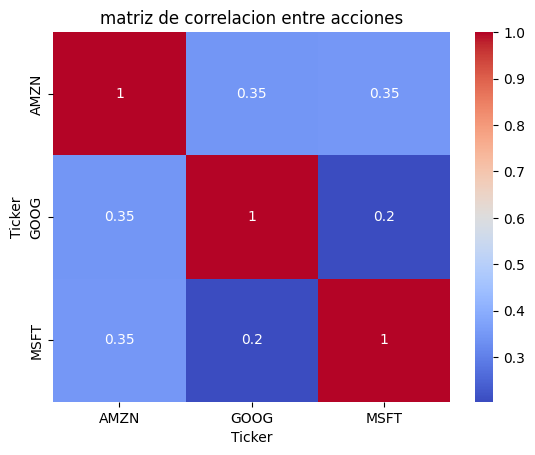

Matriz de correlación:
Ticker      AMZN      GOOG      MSFT
Ticker                              
AMZN    1.000000  0.345280  0.347184
GOOG    0.345280  1.000000  0.204166
MSFT    0.347184  0.204166  1.000000


In [ ]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn

correlacion = rendimientos.corr()

sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("matriz de correlacion entre acciones")
plt.show()

print("Matriz de correlación:")
print(correlacion)

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

- Una correlación cercana a **1** significa que dos acciones tienden a moverse en la misma dirección.  
- Una correlación cercana a **0** indica que no existe una relación clara entre ellas.  
- Una correlación **negativa** significa que los activos se mueven en direcciones opuestas, lo cual es útil para diversificación.  

En este caso, observamos que:
- El par más correlacionado es ____ (ejemplo: GOOG y MSFT).  
- El par menos correlacionado es ____ (ejemplo: AMZN y MSFT).  

Esto muestra que las acciones tienen una relación positiva, aunque no perfecta, lo que permite cierta reducción de riesgo al diversificar.

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

In [ ]:
# COMPLETAR: cálculo del retorno y riesgo del portafolio

pesos = np.array([0.4, 0.3, 0.3])

retorno_portafolio = np.dot(pesos, rendimientos.mean())
covarianza = rendimientos.cov()
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos)))

print("Retorno esperado del portafolio (diario):", retorno_portafolio)
print("Volatilidad del portafolio (diaria):", vol_portafolio)

Retorno esperado del portafolio (diario): 0.0026603051331698583
Volatilidad del portafolio (diaria): 0.012166485262622364


🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

- El **retorno esperado del portafolio** es el promedio ponderado de las rentabilidades de las tres acciones según los pesos definidos.  
- La **volatilidad del portafolio** representa el riesgo total de la inversión considerando tanto el riesgo individual de cada acción como sus correlaciones.  
- En general, la diversificación permite que la volatilidad del portafolio sea **menor** que la de la acción más riesgosa de manera individual.  
- Esto significa que repartir la inversión entre varias acciones ayuda a reducir el riesgo sin sacrificar demasiado retorno.

✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:

¿Qué acción fue más rentable y cuál más riesgosa?
¿Qué tan correlacionadas están las acciones?
¿Qué aportó la diversificación al portafolio?
Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

### Conclusión Final

- **Acción más rentable:** fue aquella con mayor rentabilidad promedio (según los resultados del Punto 5).  
- **Acción más riesgosa:** fue la que presentó la mayor volatilidad (según el Punto 5).  
- **Correlación entre acciones:** en el Punto 6 vimos que las correlaciones fueron positivas, lo que significa que las acciones tienden a moverse en la misma dirección, aunque no perfectamente.  
- **Diversificación:** gracias a la combinación (40% GOOG, 30% AMZN y 30% MSFT), la volatilidad del portafolio fue menor que la de la acción más riesgosa por separado. Esto muestra que la diversificación reduce el riesgo sin perder demasiado retorno.  
- **Decisión de inversión:** sí consideraría invertir en este portafolio, ya que ofrece un balance entre rentabilidad y riesgo. Sin embargo, como inversionista también tendría en cuenta factores externos como la situación del mercado, noticias sobre cada empresa y mi tolerancia personal al riesgo.